# Klasyfikacja - projekt (titanic dataset)

## Wczytanie danych

In [169]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Czyszczenie danych
### Wartości brakujące

Wykonaj następujące operacje
- sprawdź ile wartości brakujących znajduje się w poszczególnych kolumnach
- usuń kolumnę, w której jest najwięcej wartości brakujących
- dla pozostałych kolumn dokonaj imputacji

In [170]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
df = df.drop(columns=["Cabin"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [172]:
print(df.groupby("Survived")["Age"].mean())
print(df.groupby("Pclass")["Age"].mean())
print(df.groupby("Sex")["Age"].mean())
print(df.groupby("Embarked")["Age"].mean())

# print(df.groupby("Survived")["Age"].mean().var())
# print(df.groupby("Pclass")["Age"].mean().var())
# print(df.groupby("Sex")["Age"].mean().var())
# print(df.groupby("Embarked")["Age"].mean().var())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64


In [174]:
df.loc[df[df["Pclass"] == 1]["Age"].index, "Age"] = df[df["Pclass"] == 1]["Age"].fillna(df[df["Pclass"] == 1]["Age"].mean())
df.loc[df[df["Pclass"] == 2]["Age"].index, "Age"] = df[df["Pclass"] == 2]["Age"].fillna(df[df["Pclass"] == 2]["Age"].mean())
df.loc[df[df["Pclass"] == 3]["Age"].index, "Age"] = df[df["Pclass"] == 3]["Age"].fillna(df[df["Pclass"] == 3]["Age"].mean())

#df.isna().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [96]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

#df.isna().sum()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


### Niepotrzebne kolumny

Usuń kolumny, które nie będą przydatne w klasyfikacji

In [97]:
df = df.drop(columns=["PassengerId", "Name", "Ticket"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


### One hot encoding
Zastosuj OHE dla kolumn:
- Sex
- Embarked

In [98]:
df = pd.concat([df.drop(["Sex", "Embarked"], axis=1),
                pd.get_dummies(df["Sex"], drop_first=True, prefix="Sex"),
                pd.get_dummies(df["Embarked"], drop_first=True, prefix="Embarked")],
         axis=1)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


## Modelowanie

In [107]:
from sklearn.preprocessing import MinMaxScaler

df["Pclass"] = MinMaxScaler().fit_transform(df[["Pclass"]])
df["Age"] = MinMaxScaler().fit_transform(df[["Age"]])
df["Fare"] = MinMaxScaler().fit_transform(df[["Fare"]])

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,1.0,0.271174,1,0,0.014151,1,0,1
1,1,0.0,0.472229,1,0,0.139136,0,0,0
2,1,1.0,0.321438,0,0,0.015469,0,0,1
3,1,0.0,0.434531,1,0,0.103644,0,0,1
4,0,1.0,0.434531,0,0,0.015713,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0.5,0.334004,0,0,0.025374,1,0,1
887,1,0.0,0.233476,0,0,0.058556,0,0,1
888,0,1.0,0.310639,1,2,0.045771,0,0,1
889,1,0.0,0.321438,0,0,0.058556,1,0,0


In [117]:
df.Survived.value_counts()  # klasy są zbalansowane

0    549
1    342
Name: Survived, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

X, y = df.drop(["Survived"], axis=1), df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_test, y_pred):

    return pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'F1': f1_score(y_test, y_pred)},
                       index=['metric_value'])
    
def train_predict_and_evaluate(model, X_train, X_test, y_train, y_test):
    
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return calculate_metrics(y_test, y_pred)

def cross_validation(model, X, y):
    
    print((cross_val_score(model, X, y, scoring='accuracy').mean().round(4),
            cross_val_score(model, X, y, scoring='f1').mean().round(4)))

### Regresja logistyczna

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_lr = LogisticRegression()

cross_validation(model_lr, X, y)
train_predict_and_evaluate(model_lr, X_train, X_test, y_train, y_test)

(0.7957, 0.7206)


,accuracy,precision,recall,F1
metric_value,0.810169,0.790909,0.725,0.756522


### Drzewo decyzyjne

In [140]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

cross_validation(model_dt, X, y)
train_predict_and_evaluate(model_dt, X_train, X_test, y_train, y_test)

(0.7688, 0.7013)


,accuracy,precision,recall,F1
metric_value,0.779661,0.743363,0.7,0.72103


In [136]:
from sklearn.model_selection import GridSearchCV

params =  {'max_depth': range(1,7)}

gs = GridSearchCV(estimator=model_dt,
                    param_grid=params,
                    cv=6)

gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 3}

In [142]:
model_dt = DecisionTreeClassifier(max_depth=3)

cross_validation(model_dt, X, y)
train_predict_and_evaluate(model_dt, X_train, X_test, y_train, y_test)

(0.8081, 0.7284)


,accuracy,precision,recall,F1
metric_value,0.820339,0.825243,0.708333,0.762332


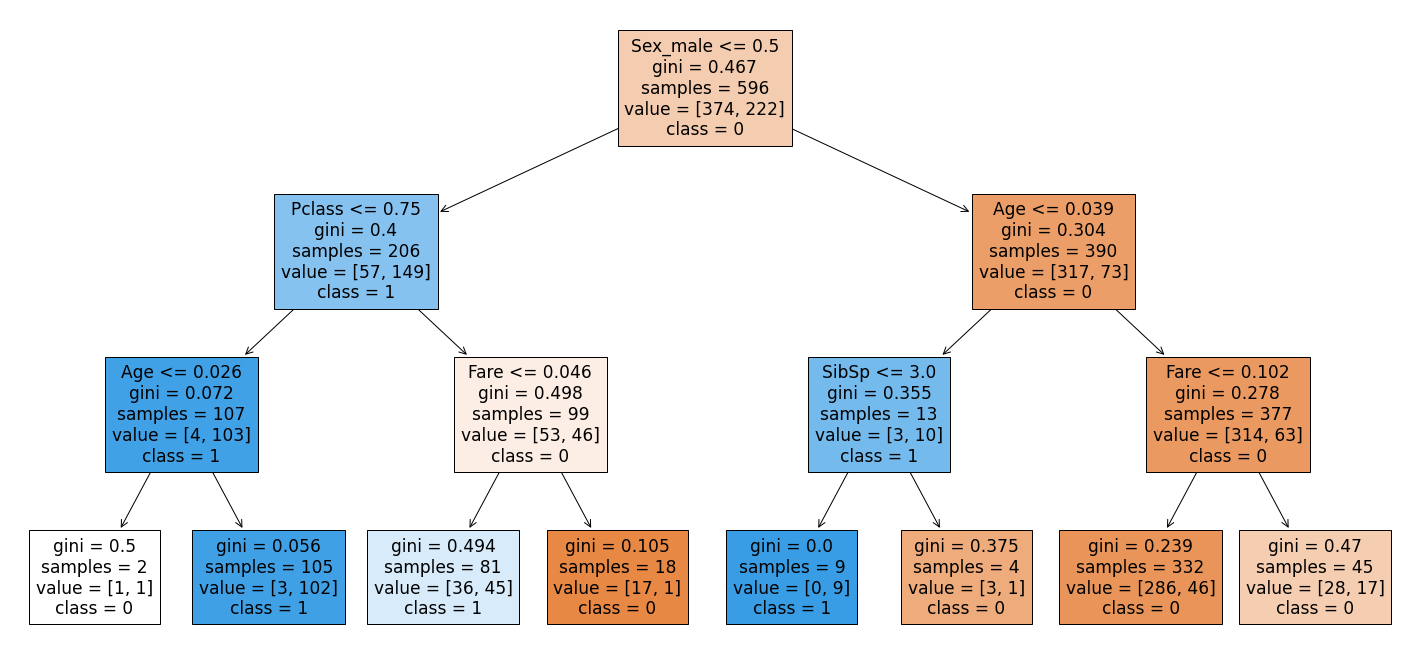

In [144]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 12))
plot_tree(model_dt, feature_names=model.feature_names_in_, class_names=model.classes_.astype('str'), filled=True);

### Naive Bayes

In [145]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

model_mnb = MultinomialNB()
model_gnb = GaussianNB()
model_bnb = BernoulliNB()

cross_validation(model_mnb, X, y)
train_predict_and_evaluate(model_mnb, X_train, X_test, y_train, y_test)

(0.651, 0.3895)


,accuracy,precision,recall,F1
metric_value,0.647458,0.653846,0.283333,0.395349


In [146]:
cross_validation(model_gnb, X, y)
train_predict_and_evaluate(model_gnb, X_train, X_test, y_train, y_test)

(0.7767, 0.7024)


,accuracy,precision,recall,F1
metric_value,0.80678,0.760331,0.766667,0.763485


In [147]:
cross_validation(model_bnb, X, y)
train_predict_and_evaluate(model_bnb, X_train, X_test, y_train, y_test)

(0.7834, 0.7149)


,accuracy,precision,recall,F1
metric_value,0.783051,0.741379,0.716667,0.728814


### Support Vector Machine

In [148]:
from sklearn.svm import SVC

model_svm = SVC()

cross_validation(model_svm, X, y)
train_predict_and_evaluate(model_svm, X_train, X_test, y_train, y_test)

(0.8126, 0.7361)


,accuracy,precision,recall,F1
metric_value,0.816949,0.823529,0.7,0.756757


In [156]:
model_svm2 = SVC(C=0.1)

cross_validation(model_svm2, X, y)
train_predict_and_evaluate(model_svm2, X_train, X_test, y_train, y_test)

(0.8047, 0.7203)


,accuracy,precision,recall,F1
metric_value,0.816949,0.83,0.691667,0.754545


### K Nearest Neighbours

In [157]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

cross_validation(model_knn, X, y)
train_predict_and_evaluate(model_knn, X_train, X_test, y_train, y_test)

(0.7868, 0.7103)


,accuracy,precision,recall,F1
metric_value,0.783051,0.77451,0.658333,0.711712


In [160]:
n_neighbors_list = [2, 5, 8, 10, 15, 20]
cross_val_score_list = []

for n in n_neighbors_list:
    model_knn = KNeighborsClassifier(n_neighbors=n)
    cross_val_score_list.append(cross_val_score(model_knn, X, y, scoring='accuracy').mean())
    
cross_val_score_list

[0.773316176009039,
 0.786793045006591,
 0.793496955621116,
 0.8024794425961961,
 0.7811374050593183,
 0.7957692549118073]

In [161]:
model_knn = KNeighborsClassifier(n_neighbors=10)

cross_validation(model_knn, X, y)
train_predict_and_evaluate(model_knn, X_train, X_test, y_train, y_test)

(0.8025, 0.7131)


,accuracy,precision,recall,F1
metric_value,0.8,0.835165,0.633333,0.720379


### RandomForestClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

cross_validation(model_rf, X, y)
train_predict_and_evaluate(model_rf, X_train, X_test, y_train, y_test)

(0.816, 0.7469)


,accuracy,precision,recall,F1
metric_value,0.79322,0.743802,0.75,0.746888


In [167]:
params = {"n_estimators": np.arange(1, 10, 1), "max_depth": [1, 2, 3, 4, 5]}
best_values = np.zeros([len(params["n_estimators"]), len(params["max_depth"])])

best_score = 0
optimal_n = None
optimal_depth = None

for i, n in enumerate(params["n_estimators"]):
    for j, depth in enumerate(params["max_depth"]):
        
        model = RandomForestClassifier(n_estimators=n, max_depth=depth,
                                       criterion='entropy', max_features='sqrt', random_state=0)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        #score = accuracy_score(y_test, y_pred)
        score = recall_score(y_test, y_pred)
        
        best_values[i, j] = score
        
        if score > best_score:
            
            best_score = score
            optimal_n = n
            optimal_depth = depth
            
print(f"Best score: {round(best_score, 2)}. Optimal n_estimators: {optimal_n}. Optimal max_depth: {optimal_depth}")

Best accuracy: 0.68. Optimal n_estimators: 1. Optimal max_depth: 2


In [165]:
pd.DataFrame(best_values, index=params["n_estimators"], columns=params["max_depth"])

,1,2,3,4,5
1,0.593220,0.684746,0.779661,0.772881,0.664407
2,0.593220,0.684746,0.779661,0.762712,0.718644
3,0.647458,0.772881,0.779661,0.766102,0.786441
4,0.667797,0.759322,0.810169,0.796610,0.789831
5,0.752542,0.786441,0.783051,0.810169,0.779661
6,0.681356,0.786441,0.803390,0.800000,0.762712
7,0.772881,0.786441,0.786441,0.796610,0.793220
8,0.772881,0.769492,0.783051,0.783051,0.800000
9,0.722034,0.779661,0.783051,0.786441,0.786441


In [168]:
best_model = RandomForestClassifier(n_estimators=optimal_n, max_depth=optimal_depth,
                                    criterion='entropy', max_features='sqrt', random_state=0)

cross_validation(best_model, X, y)
train_predict_and_evaluate(best_model, X_train, X_test, y_train, y_test)

(0.6679, 0.4584)


,accuracy,precision,recall,F1
metric_value,0.684746,0.59854,0.683333,0.638132
